# ANN for Regression


In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Abhinav Mars\AppData\Local\Temp\ipykernel_30628\2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


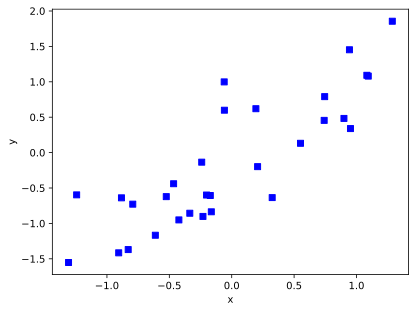

In [2]:
#create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'bs')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#Build your network model

ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # Activation function
    nn.Linear(1,1) # Output layer
)

In [4]:
#learning rate
learnrate = 0.05

#loss function
lossfun = nn.MSELoss()

#optimizer (Flavor of the G.D algo used)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learnrate)

c:\Users\Abhinav Mars\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

##Train the model

for i in range(numepochs):

    yhat = ANNreg(x) # pass the x value through the model

    loss = lossfun(yhat,y) # compute the loss
    losses[i] = loss       # List all the losses

    #back propogation
    optimizer.zero_grad()
    loss.backward()        # Implement backprop based on the losses
    optimizer.step()


Text(0.5, 1.0, 'Final loss = 0.229579')

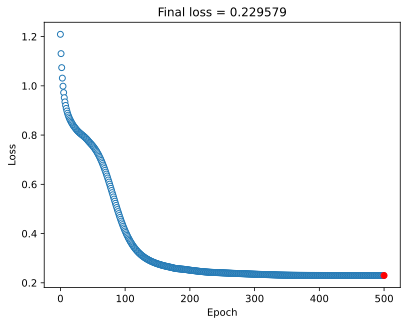

In [6]:
#manually compute losses
# final forward pass

final_predictions = ANNreg(x)

# final loss
testloss = (final_predictions - y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.plot(numepochs,testloss.detach(),'ro') #plotting the final 500th loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())

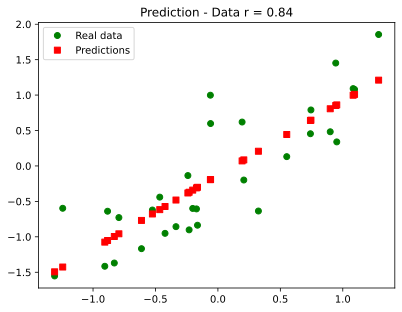

In [7]:
# plot the data
plt.plot(x,y,'go',label='Real data')
plt.plot(x,final_predictions.detach(),'rs',label = 'Predictions')
plt.title(f'Prediction - Data r = {np.corrcoef(y.T,final_predictions.detach().T)[0,1]:0.2f}')
plt.legend()
plt.show()

# Code Challenge

In [8]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Abhinav Mars\AppData\Local\Temp\ipykernel_30628\2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [9]:
def build_n_train(x,y):

    #Build the model
    ANNregr = nn.Sequential(
        nn.Linear(1,1), #input layer
        nn.ReLU(),         #Activation Function
        nn.Linear(1,1) #Output layer
    )

    #learning rate
    learnrate = 0.05

    #loss function
    lossfun = nn.MSELoss()

    #optimizer (Flavor of the G.D algo used)
    optimizer = torch.optim.SGD(ANNregr.parameters(),lr=learnrate)

    #Train the model
    numofepochs = 500

    losses = torch.zeros(numofepochs)


    for epoch in range(numofepochs):

        #Forward pass
        yhat = ANNregr(x)

        #Compute and list the losses
        loss = lossfun(yhat,y)
        losses[epoch] = loss

        #Back Propogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #Final forward pass
    final_pred = ANNregr(x)

    #Return final predictions and losses
    return final_pred,losses


In [10]:
def create_data(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2

    return x,y

In [11]:
slopes = np.linspace(-2,2,21)

epochs = 50
losses = np.zeros(len(slopes))
corr_coeffs = np.zeros(len(slopes))
for idx,slope in enumerate(slopes):
    #create dataset
    data_x,data_y = create_data(slope)

    for epoch in range(epochs):
        #run the model
        final_predictions,final_loss = build_n_train(data_x,data_y)
        losses[idx] = final_loss[-1]
        corr_coeffs[idx] = np.corrcoef(data_y.T,final_predictions.detach().T)[0,1]

corr_coeffs[np.isnan(corr_coeffs)] = 0


c:\Users\Abhinav Mars\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Abhinav Mars\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Model Performance')

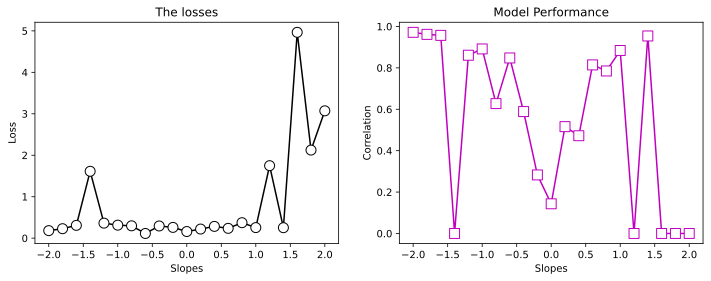

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (12,4))

axes[0].plot(slopes,losses,'ko-',markerfacecolor='w',markersize='10')
axes[0].set_xlabel("Slopes")
axes[0].set_ylabel("Loss")
axes[0].set_title("The losses")

axes[1].plot(slopes,corr_coeffs,'ms-',markerfacecolor='w',markersize='10')
axes[1].set_xlabel("Slopes")
axes[1].set_ylabel("Correlation")
axes[1].set_title("Model Performance")

# ANN for Binary Classification

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-121-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Text(0, 0.5, 'qwerty dimension 2')

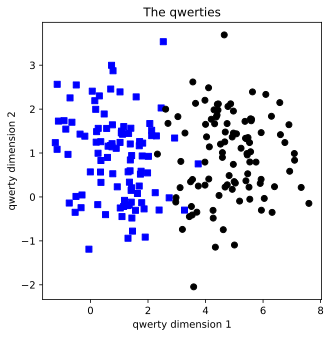

In [ ]:
#create data

nPerClust = 100
blur = 1

#Centers for the data clouds
A = [1,1]
B = [5,1]

# Generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data

figure = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels == 0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels == 1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')


In [ ]:
# build model
ANNclassify = nn.Sequential(
    nn.Linear(2,1), # input layer
    nn.ReLU(),       # Activation unit
    nn.Linear(1,1),  # Output unit
    nn.Sigmoid()    # final activation unit
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# other model features

learnrate = 0.1

#loss function
lossfun = nn.BCELoss()

#Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learnrate)



In [ ]:
#train the model

numepochs = 1000
losses = torch.zeros(numepochs)

for epoch in range(numepochs):

    #forward pass
    yhat = ANNclassify(data)

    #compute loss
    loss = lossfun(yhat,labels)
    losses[epoch] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


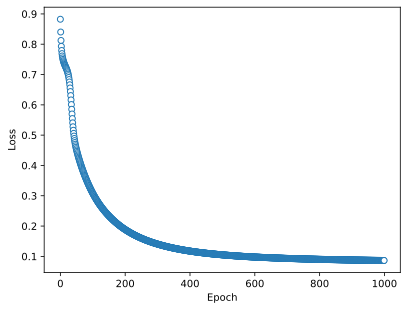

In [ ]:
#plot the losses
plt.plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#compute the predictions

#manually compute losses

prediction = ANNclassify(data)
predlabels = prediction > 0.5

#finderrrors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)

print('Final accuracy is : %g%%' %totalacc)



Final accuracy is : 97%


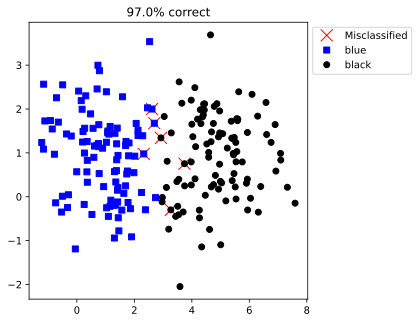

In [ ]:
#plot the labelled data
fig = plt.figure(figsize = (5,5))
plt.plot(data[misclassified,0], data[misclassified,1],'rx',markersize=12 )
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

# Experiments with learning rates

Text(0, 0.5, 'qwerty dimension 2')

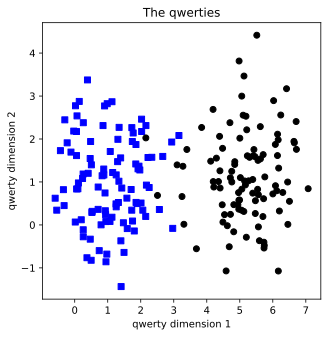

In [ ]:
#create data

nPerClust = 100
blur = 1

#Centers for the data clouds
A = [1,1]
B = [5,1]

# Generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data

figure = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels == 0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels == 1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')

In [ ]:
def createANNmodel(learningrate):

    # build model
    ANNclassify = nn.Sequential(
    nn.Linear(2,1), # input layer
    nn.ReLU(),       # Activation unit
    nn.Linear(1,1),  # Output unit
    # nn.Sigmoid()    # final activation unit
    )

    #loss function
    lossfun = nn.BCEWithLogitsLoss()

    # optimizer
    optimizer =  torch.optim.SGD(ANNclassify.parameters(),lr = learningrate)

    # model output
    return ANNclassify,lossfun,optimizer


In [ ]:
def trainmodel(ANNmodel):

    #initiate losses
    losses = torch.zeros(numepochs)

    for epoch in range(numepochs):

        yhat = ANNmodel(data)

        loss = lossfun(yhat,labels)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #final forward pass
    predictions = ANNmodel(data)

    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc


In [ ]:
# the set of learning rates to be tested
learningrates = np.linspace(0.001,0.1,40)

#initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

#loop through learning rates
for i,lr in enumerate(learningrates):

    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainmodel(ANNclassify)

    #store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()


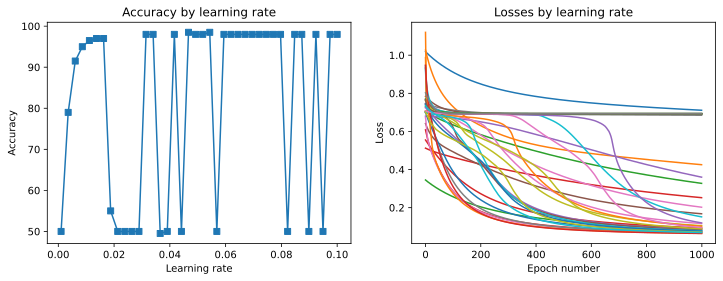

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (12,4))

axes[0].plot(learningrates,accByLR,'s-')
axes[0].set_xlabel("Learning rate")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy by learning rate")

axes[1].plot(allLosses.T)
axes[1].set_xlabel("Epoch number")
axes[1].set_ylabel("Loss")
axes[1].set_title("Losses by learning rate")

plt.show()

# Multilayer ANN


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-82-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Text(0, 0.5, 'qwerty dimension 2')

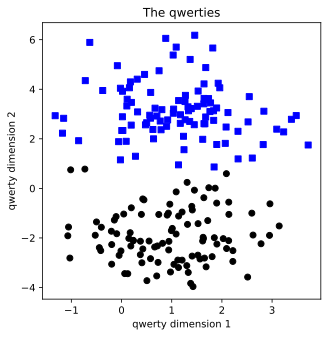

In [ ]:
#create data

nPerClust = 100
blur = 1

#Centers for the data clouds
A = [1,3]
B = [1,-2]

# Generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data

figure = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels == 0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels == 1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')

In [ ]:
#Build the model

def buildmodel(learningrate):

    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()
    )

    #loss function
    lossfun = nn.BCELoss()

    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningrate)

    #model output
    return ANNclassify,lossfun,optimizer



In [ ]:
#Train the model

numofepochs = 1000

def trainmodel(ANNmodel):

    #initialize losses
    losses = torch.zeros(numofepochs)

    #loop over the epochs
    for epoch in range(numofepochs):

        #Forward pass
        yhat = ANNmodel(data)

        #compute loss
        loss = lossfun(yhat,labels)
        losses[epoch] = loss

        #back propogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #final forward pass
    predictions = ANNmodel(data)

    totalacc = 100*torch.mean(((predictions > 0.5) == labels).float())

    return losses,predictions,totalacc

Final accuracy = 100%


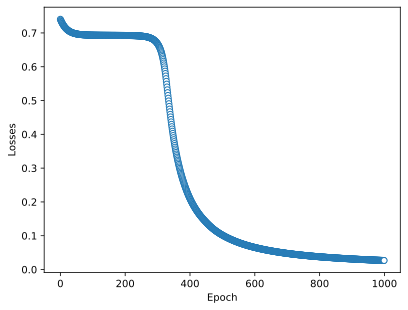

In [ ]:
#Testing our model

ANNclassify,lossfun,optimizer = buildmodel(0.1)

losses,predictions,totalacc = trainmodel(ANNclassify)

print('Final accuracy = %g%%' %totalacc)

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.show()


In [ ]:
# the set of learning rates to be tested
learningrates = np.linspace(0.001,0.1,40)

#initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numofepochs))

#loop through learning rates
for i,lr in enumerate(learningrates):

    ANNclassify,lossfun,optimizer = buildmodel(lr)
    losses,predictions,totalacc = trainmodel(ANNclassify)

    #store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

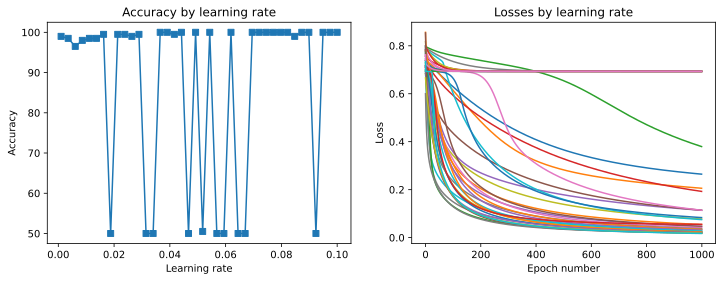

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (12,4))

axes[0].plot(learningrates,accByLR,'s-')
axes[0].set_xlabel("Learning rate")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy by learning rate")

axes[1].plot(allLosses.T)
axes[1].set_xlabel("Epoch number")
axes[1].set_ylabel("Loss")
axes[1].set_title("Losses by learning rate")

plt.show()

# ANN for IRIS dataset


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-89-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#check out first few lines of data()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


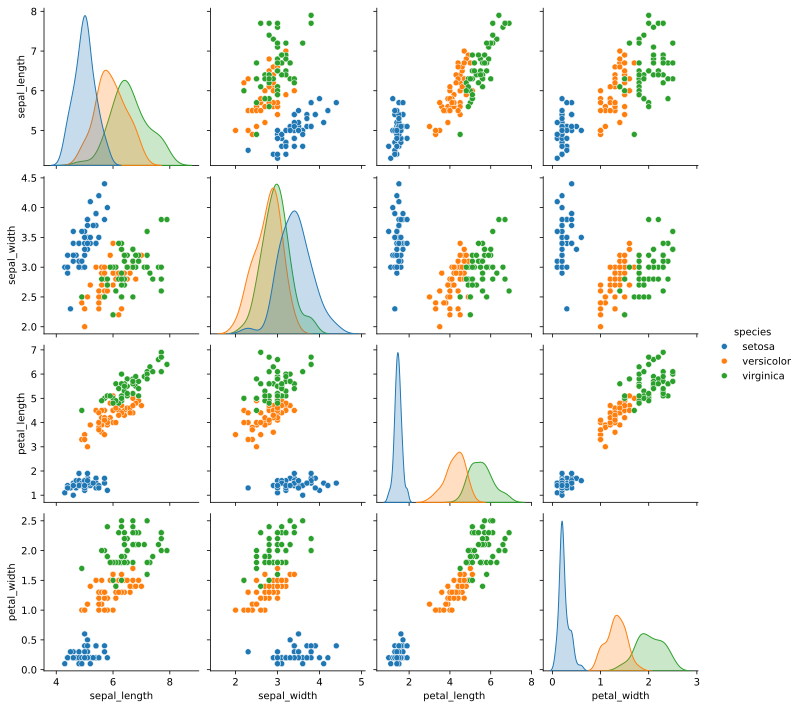

In [ ]:
#Plot the data
sns.pairplot(iris,hue='species')
plt.show()

In [ ]:
#oraganize the data

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data),dtype=torch.long)
#labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [ ]:
#Create the ANN model

#model architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64), #input layer
    nn.ReLU(),       #Activation fxn
    nn.Linear(64,64),#Hidden layer
    nn.ReLU(),       #Activation fxn
    nn.Linear(64,3)  #Output layer
)

#lossfun
lossfun = nn.CrossEntropyLoss() #Already perform Softmax funxtion

#optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr = 0.01)


In [ ]:
#Train the model
numofepochs = 1000

#initialize losses
losses = torch.zeros(numofepochs)
ongoingACC = []
for epoch in range(numofepochs):

    #Forward pass
    yhat = ANNiris(data)

    #Compute loss
    loss = lossfun(yhat,labels)
    losses[epoch] = loss

    #Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #compute accuracy
    matches = torch.argmax(yhat,axis=1) == labels #booleans (true/false)...Here the shape of the yaht is 150samples * 3 values...We assign the smaple to the speicies of highest yhat.
    matchesNumeric = matches.float()
    accuracyPrct = 100*torch.mean(matchesNumeric) #average*100
    ongoingACC.append(accuracyPrct) #Collect all the accuracy in each epoch

#Final forward pass
predictions = ANNiris(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())


Final accuracy : 98.0%


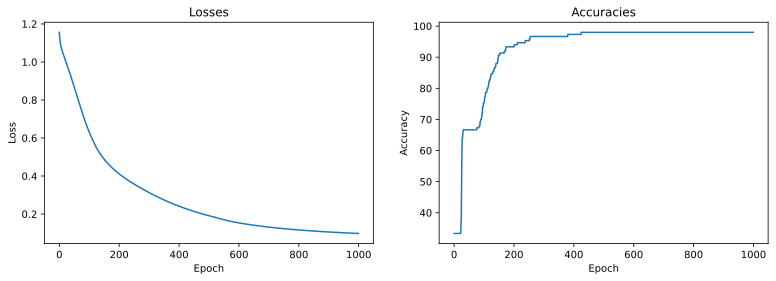

In [ ]:
#Visualize the results
print(f'Final accuracy : {totalacc}%')

fig,axes = plt.subplots(1,2,figsize=(13,4))

axes[0].plot(losses.detach())
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Losses')

axes[1].plot(ongoingACC)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracies')
plt.show()

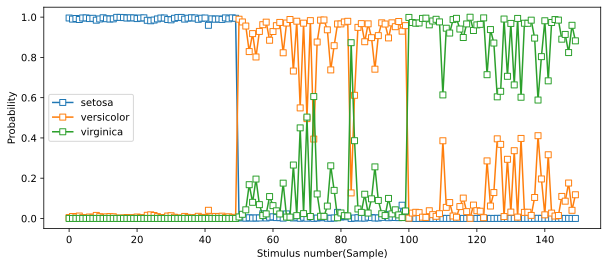

In [ ]:
#Plot the raw model outputs
sm = nn.Softmax(1)

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yhat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number(Sample)')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()


# CodeChallenge - Triple Category


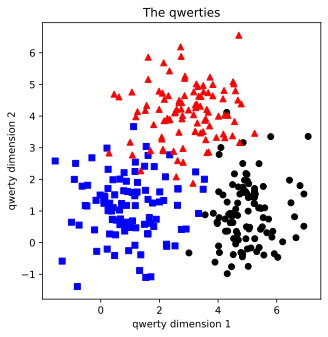

In [ ]:
#create data

nPerClust = 100
blur = 1

#Centers for the data clouds
A = [1,1]
B = [5,1]
C = [3,4]

# Generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]
c = [C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]
#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),2*np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

#show the data
figure = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels == 0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels == 1)[0],1],'ko')
plt.plot(data[np.where(labels == 2)[0],0],data[np.where(labels == 2)[0],1],'r^')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
# build model
ANNclassify = nn.Sequential(
    nn.Linear(2,4), # input layer
    nn.ReLU(),      # Activation unit
    nn.Linear(4,3),
    nn.Softmax(dim=1) #Final activation fxn
)

#lossfun
lossfun = nn.CrossEntropyLoss() #Already perform Softmax funxtion

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = 0.01)

ANNclassify


Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [ ]:
#Train the model

numepochs = 10000
losses = torch.zeros(numepochs)
ongoingACC = []
for epoch in range(numepochs):

    #forward pass
    yhat = ANNclassify(data)

    #compute loss
    loss = lossfun(yhat,labels)
    losses[epoch] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #compute accuracy
    matches = torch.argmax(yhat,axis=1) == labels #booleans (true/false)...Here the shape of the yaht is 150samples * 3 values...We assign the smaple to the speicies of highest yhat.
    matchesNumeric = matches.float()
    accuracyPrct = 100*torch.mean(matchesNumeric) #average*100
    ongoingACC.append(accuracyPrct) #Collect all the accuracy in each epoch

#Final forward pass
predictions = ANNclassify(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())


Final accuracy : 94.0%


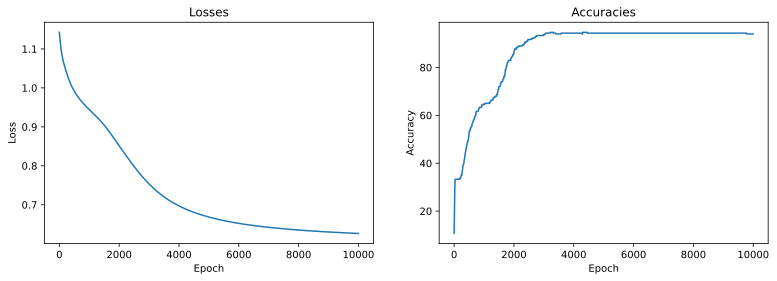

In [ ]:
#Visualize the results
print(f'Final accuracy : {totalacc}%')

fig,axes = plt.subplots(1,2,figsize=(13,4))

axes[0].plot(losses.detach())
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Losses')

axes[1].plot(ongoingACC)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracies')
plt.show()

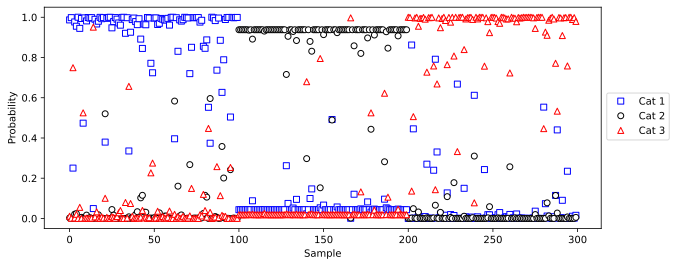

In [ ]:
#Plot the raw model outputs
sm = nn.Softmax(1)

fig = plt.figure(figsize=(10,4))

colorshape = ['bs','ko','r^']
for i in range(3):
    plt.plot(yhat[:,i].detach(),colorshape[i],markerfacecolor='w')


plt.xlabel('Sample')
plt.ylabel('Probability')
plt.legend(['Cat 1','Cat 2','Cat 3'],loc=(1.01,0.4))
plt.show()

# Deep Models vs Wide Models


In [ ]:
import torch
import numpy as np
import torch.nn as nn


In [ ]:
#build two models
widenet = nn.Sequential(
    nn.Linear(2,4),
    nn.Linear(4,3)
)

deepnet = nn.Sequential(
    nn.Linear(2,2),
    nn.Linear(2,2),
    nn.Linear(2,3),
)

In [ ]:
#The parameters in widenet
for p in widenet.named_parameters():
    print(p)
    print(' ')

('0.weight', Parameter containing:
tensor([[-0.5912,  0.3494],
        [-0.5206, -0.6561],
        [-0.0522,  0.1040],
        [ 0.7044,  0.2582]], requires_grad=True))
 
('0.bias', Parameter containing:
tensor([-0.5735, -0.5901,  0.6567,  0.3299], requires_grad=True))
 
('1.weight', Parameter containing:
tensor([[-0.2221, -0.1944, -0.2890,  0.2768],
        [ 0.1343, -0.3224,  0.0450,  0.1466],
        [-0.4247, -0.3045,  0.1359,  0.3991]], requires_grad=True))
 
('1.bias', Parameter containing:
tensor([ 0.1649, -0.1822, -0.4656], requires_grad=True))
 


In [ ]:
#The parameters in deepnet
for p in deepnet.named_parameters():
    print(p)
    print(' ')

('0.weight', Parameter containing:
tensor([[ 0.5625, -0.2186],
        [-0.5519,  0.4884]], requires_grad=True))
 
('0.bias', Parameter containing:
tensor([ 0.4923, -0.6160], requires_grad=True))
 
('1.weight', Parameter containing:
tensor([[-0.3695,  0.6156],
        [ 0.0407,  0.1163]], requires_grad=True))
 
('1.bias', Parameter containing:
tensor([-0.1638,  0.1944], requires_grad=True))
 
('2.weight', Parameter containing:
tensor([[-0.2663, -0.0361],
        [ 0.6931, -0.0978],
        [-0.1033, -0.5233]], requires_grad=True))
 
('2.bias', Parameter containing:
tensor([ 0.0117, -0.0677,  0.3468], requires_grad=True))
 


In [ ]:
#Count the nodes in each network by counting the biases
nodesinWidenet = 0
for p in widenet.named_parameters():
    if 'bias' in p[0]:
        nodesinWidenet += len(p[1])

print(f"The nodes in wide net are = {nodesinWidenet}")

nodesinDeepnet = 0
for p in deepnet.named_parameters():
    if 'bias' in p[0]:
        nodesinDeepnet += len(p[1])

print(f"The nodes in deep net are = {nodesinDeepnet}")

The nodes in wide net are = 7
The nodes in deep net are = 7


In [ ]:
for p in widenet.parameters():
    print(p)

Parameter containing:
tensor([[-0.5912,  0.3494],
        [-0.5206, -0.6561],
        [-0.0522,  0.1040],
        [ 0.7044,  0.2582]], requires_grad=True)
Parameter containing:
tensor([-0.5735, -0.5901,  0.6567,  0.3299], requires_grad=True)
Parameter containing:
tensor([[-0.2221, -0.1944, -0.2890,  0.2768],
        [ 0.1343, -0.3224,  0.0450,  0.1466],
        [-0.4247, -0.3045,  0.1359,  0.3991]], requires_grad=True)
Parameter containing:
tensor([ 0.1649, -0.1822, -0.4656], requires_grad=True)


In [ ]:
#Count the trainable parameters
paramsinWidenet = 0
for p in widenet.parameters():
    if p.requires_grad:
        paramsinWidenet += p.numel()

print(f"Trainable parameters in wide net = {paramsinWidenet}")

#Count the trainable parameters
paramsinDeepnet = 0
for p in deepnet.parameters():
    if p.requires_grad:
        paramsinDeepnet += p.numel()

print(f"Trainable parameters in deep net = {paramsinDeepnet}")

Trainable parameters in wide net = 27
Trainable parameters in deep net = 21


# Experiment - Vary Hidden Layers


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-12-1c359050ce4e>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
# import and oragnize data
import seaborn as sns
iris = sns.load_dataset('iris')

# convert from pandas to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to number
labels = torch.zeros(len(data),dtype=torch.long)

# labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [ ]:
class ANNiris(nn.Module):
    def __init__(self,nUnits,nLayers):
        super().__init__()

        #create dictionary to store model
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        #input layer
        self.layers['input'] = nn.Linear(4,nUnits)

        #hidden layers
        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

        #output layer
        self.layers['output'] = nn.Linear(nUnits,3)

    #forward pass
    def forward(self,x):

        #input layer
        x = self.layers['input'](x)

        #hidden layers
        for i in range(self.nLayers):
            x = self.layers[f'hidden{i}'](x)

        #output layers
        x = self.layers['output'](x)

        return x

In [ ]:
number_of_units = 12
number_of_layers = 4

net = ANNiris(number_of_units,number_of_layers)
print(net)

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


In [ ]:
#A quick test

tmpx = torch.randn(10,4)

y = net.forward(tmpx)
print(y.shape)
print(' ')
print(y)

torch.Size([10, 3])
 
tensor([[0.1034, 0.1091, 0.2810],
        [0.0639, 0.0976, 0.2684],
        [0.0942, 0.1185, 0.2696],
        [0.0855, 0.0911, 0.2945],
        [0.0776, 0.0840, 0.2941],
        [0.0449, 0.0955, 0.2449],
        [0.0736, 0.1100, 0.2604],
        [0.0774, 0.1106, 0.2618],
        [0.0765, 0.0993, 0.2762],
        [0.0601, 0.0752, 0.2750]], grad_fn=<AddmmBackward0>)


In [ ]:
#Train the model

def traintheModel(Model):

    numofepochs = 1000
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(Model.parameters(),lr = 0.01)

    for epoch in range(numofepochs):

        #forward pass
        yhat = Model.forward(data)

        #computeloss
        loss = lossfun(yhat,labels)

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #final forward pass for accuracy
    predictions = Model(data)
    predlabels = torch.argmax(predictions,axis = 1)
    acc = 100*torch.mean((predlabels == labels).float())

    #total trainable parameters in the model
    params = 0
    for p in Model.parameters():
        if p.requires_grad:
            params += p.numel()

    return acc,params


In [ ]:
#A complete test
acc,params = traintheModel(net)
print(acc)
print(params)

tensor(97.3333)
723


In [ ]:
numLayers = range(1,6)
numunits = np.arange(4,101,3)

#initialize output matrices
accuracies = np.zeros((len(numunits),len(numLayers)))

totalparams = np.zeros((len(numunits),len(numLayers)))

for unitidx in range(len(numunits)):
    for layeridx in range(len(numLayers)):

        network = ANNiris(numunits[unitidx],numLayers[layeridx])

        acc,params = traintheModel(network)

        accuracies[unitidx,layeridx] = acc
        totalparams[unitidx,layeridx] = params

Text(0, 0.5, 'Accuracies')

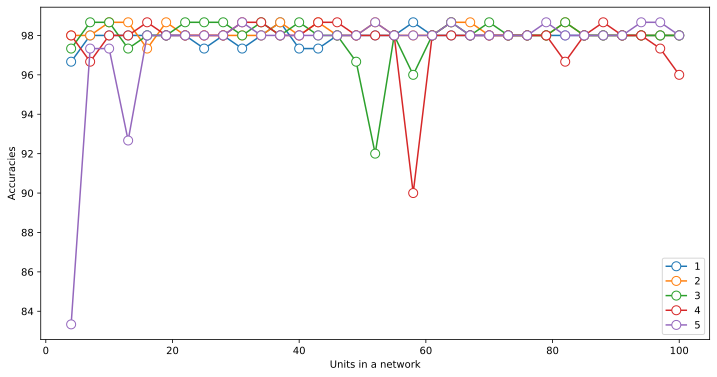

In [ ]:

#Plot the accuracies
fig,ax = plt.subplots(1,figsize=(12,6))
ax.plot(numunits,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.legend(numLayers)
ax.set_xlabel('Units in a network')
ax.set_ylabel('Accuracies')